# Linear Algebra
- `sympy` can be use to solve linear algebra problems.
- In this notebook `sympy` is not imported as `sy` because a variable `sy` is used to refer to a matrix representing the $y$ component of spin.

In [1]:
import numpy as np
import sympy

In [2]:
sympy.init_printing()

## Spin-1/2 example
- Consider the Pauli matrices $\sigma_x$, $\sigma_y$, $\sigma_z$.
- Define them using `sympy.Matrix`
- Construct a spin matrix, $h$ along a direction given by polar angle $\theta$ and azimuthal angle $\phi$

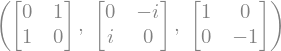

In [3]:
σx = sympy.Matrix([[0, 1], [1, 0]])
σy = sympy.Matrix([[0, -sympy.I], [sympy.I, 0]])
σz = sympy.Matrix([[1, 0], [0, -1]])

σx, σy, σz

In [29]:
phi = sympy.Symbol("phi", real=True)
theta = sympy.Symbol('theta', real=True)
theta, phi

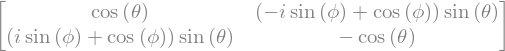

In [28]:
h = sympy.cos(theta) * σz \
    + sympy.sin(theta) \
    * (sympy.cos(phi) * σx + sympy.sin(phi) * σy)
h

### Eigenvalues and eigenvectors
- Find eigenvalues and eigenvectors of `h`

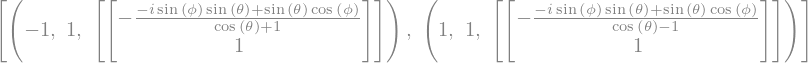

In [10]:
h_eigenvects_out = h.eigenvects()

h_eigenvects_out

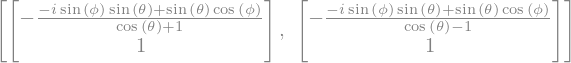

In [11]:
h_eigenvects = [h_eigenvects_out[0][2][0], h_eigenvects_out[1][2][0]]
h_eigenvects

- The eigenvectors are not normalized.
- The function `hsnormalize` normalizes them.

In [12]:
def hsnormalize(v):
    """
    Normalizes a matrix using a Hilbert-Schmidt norm
    
    Parameters
    ---------
    v: sympy.Matrix
        Matrix to be normalized
    
    p: int
        p of p-norm
        
    Returns
    -------
    v_normalized: sympy.Matrix
    
    ..math:: 
    v_{\\mathrm{normalized}} = v / \\Vert v \\Vert_{\mathrm{HS}}
    
    \\Vert v \\Vert_{\mathrm{HS}} = 
    \\sqrt{\\mathrm{Tr} \\left(v^\\dagger v \\right)}
    """
    
    norm_v = sympy.sqrt(sympy.trace(v.adjoint() * v))
    
    v_normalized = v / norm_v
    
    return v_normalized

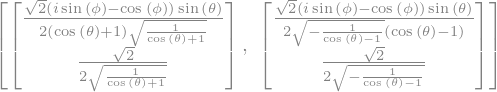

In [13]:
[sympy.simplify(hsnormalize(u)) for u in h_eigenvects]

### Derivatives of matrices
- Matrices can be differentialted with respect their arguments
- Find the derivative of `h` with respect to `phi`
- Find the derivative of `h` with respect to `theta`

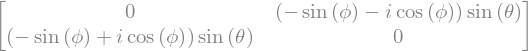

In [14]:
dh_dphi = sympy.diff(h, phi)

dh_dphi

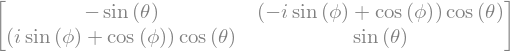

In [15]:
dh_dtheta = sympy.diff(h, theta)

dh_dtheta

### Exponentiating matrices
- `sympy.exp` can exponential matrices.
- For example, $\exp(-\mathrm{i} \Theta \sigma_x/2)$ can be evaluated using `sympy` using `sympy.exp`

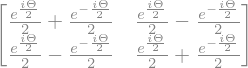

In [33]:
Theta = sympy.Symbol("Theta")
exp_σx_Theta = sympy.exp(sympy.I * Theta * σx/2)

exp_σx_Theta

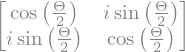

In [34]:
sympy.simplify(exp_σx_Theta)

- `sympy.exp` is less susceptible to loss of precision than numerical matrix exponential using, for example, `scipy.linalg.expm`

In [35]:
import scipy.linalg

σx_numpy = np.array([[0, 1], [1, 0]], dtype=complex)
expm_σx_pi = scipy.linalg.expm(-1j * np.pi * numpy_σx)
expm_σx_pi

array([[-1.-0.00000000e+00j,  0.-2.35127499e-16j],
       [ 0.-2.35127499e-16j, -1.-0.00000000e+00j]])

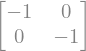

In [41]:
exp_σx_Theta.subs({'Theta': 2*sympy.pi})

## Spin-1 example
Next, we consider the spin-1 matrices $S_x$, $S_y$ and $S_z$
- Define the matrices using `sympy.Matrix`
- Use constant symbol `hbar` which is obtained using the function `sympy.physics.quantum.hbar`

In [16]:
import sympy.physics.quantum

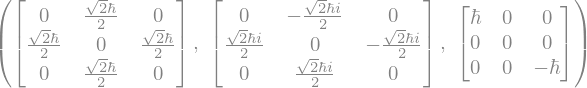

In [17]:
hbar = sympy.physics.quantum.hbar

sx = hbar / sympy.sqrt(2) * \
    sympy.Matrix([[0, 1, 0], \
                  [1, 0, 1], \
                  [0, 1, 0]])

sy =  hbar / sympy.sqrt(2) * sympy.I * \
    sympy.Matrix([[0, -1, 0], \
                  [1, 0, -1], \
                  [0, 1, 0]])

sz = hbar * \
    sympy.Matrix([[1, 0, 0], \
                  [0, 0, 0], \
                  [0, 0, -1]])

sx, sy, sz

### Eigenvalues and eigenvectors
- Find the eigenvalues and eigenvectors of Hermitian operators `sx`, `sy`, `sz`.

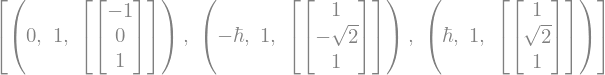

In [18]:
sx_eigenvects_out = sx.eigenvects()
sx_eigenvects_out

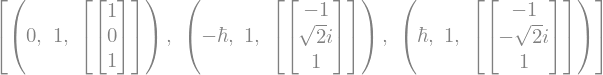

In [19]:
sy_eigenvects_out = sy.eigenvects()
sy_eigenvects_out

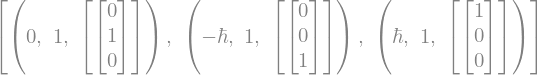

In [20]:
sz_eigenvects_out = sz.eigenvects()
sz_eigenvects_out

### Singular value decomposition
- `sympy` also performs singular value decompositions.
    - Consider a non-necessarily  matrix $A$.
    - The singular value decomposition of $A$ involves writing $A$ as
    $A = U S V^\dagger$, where $U$ and $V$ are isometries and $S$ is a diagonal matrix of singular values.
- Consider the non-Hermitian operators $S_{\pm} = S_x \pm \mathrm{i} S_y$.
- Find the singular value decompositions of $S_+$, $S_-$, $S_+^2$, $S_-^2$, $S_+ S_-$ and $S_- S_+$


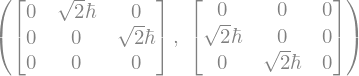

In [21]:
sp = sx + sympy.I * sy
sm = sx - sympy.I * sy

sp, sm

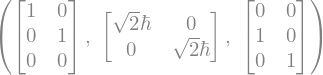

In [22]:
sp.singular_value_decomposition()

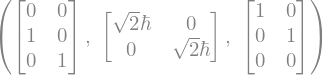

In [23]:
sm.singular_value_decomposition()

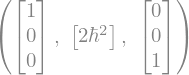

In [24]:
(sp * sp).singular_value_decomposition()

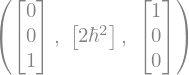

In [25]:
(sm * sm).singular_value_decomposition()

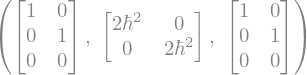

In [26]:
(sp * sm).singular_value_decomposition()

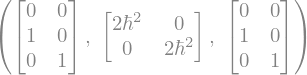

In [27]:
(sm * sp).singular_value_decomposition()